<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/MNIST15_niekompletnyCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sun Apr 23 07:39:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    32W /  70W |   4471MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

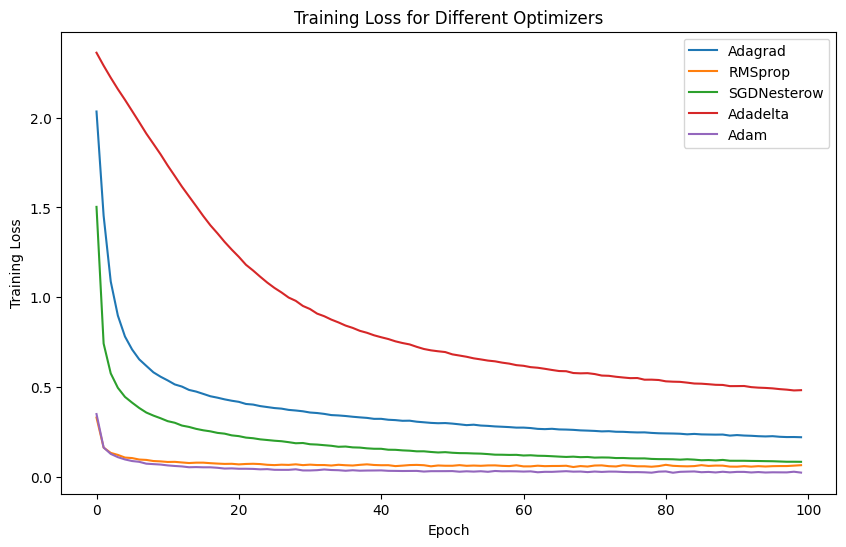

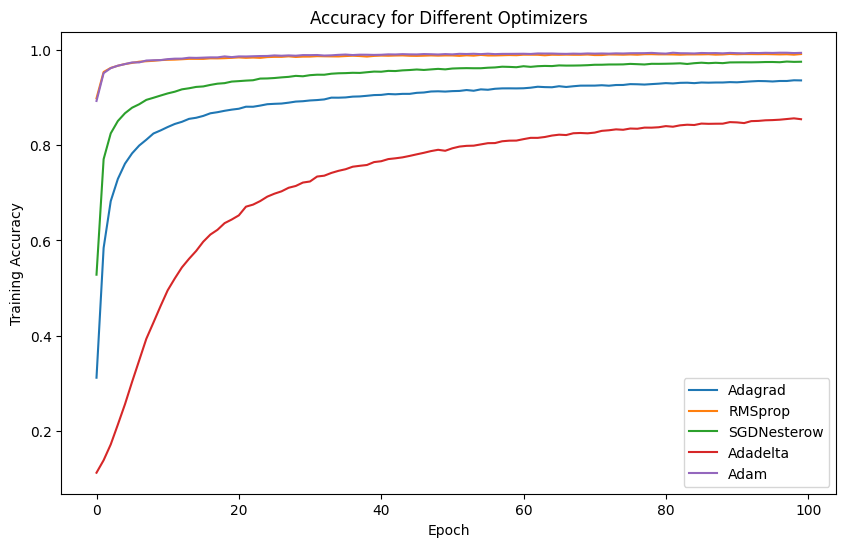

In [24]:
!nvidia-smi
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adagrad, RMSprop, SGD, Adadelta, Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

batch_size = 128
epochs = 100
optimizer_names = ['Adagrad', 'RMSprop', 'SGDNesterow', 'Adadelta', 'Adam']
optimizers = [Adagrad(), RMSprop(), SGD(nesterov=True), Adadelta(), Adam()]

# Train models with different optimizers
history = {}
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    print(f'Training model with {optimizer_name} optimizer...')
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history[optimizer_name] = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                                        verbose=0, validation_data=(X_test, y_test))

# Plot training loss for all models on one graph
plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['loss'], label=optimizer_name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['accuracy'], label=optimizer_name)
plt.title('Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()